# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [5]:
%%R -o df
 
# Import data with R
df <- read_csv('2023_subway_censusvar.csv')
df

Rows: 18208 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (28): Common Name, Equipment Description, Executive Comment, Outage Cod...
dbl  (18): GEOID, Outage, Station MRN, Station ID, Complex ID, lat, long, AD...
dttm  (4): Out of Service Date, Estimated Return to Service Date, Actual Ret...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 18,208 × 50
         GEOID `Out of Service Date` `Common Name` Outage Equipment Descriptio…¹
         <dbl> <dttm>                <chr>          <dbl> <chr>                 
 1 36005006500 2023-03-15 00:05:00   EL130         819718 ELE: EL130 - 434 - 3 …
 2 36005006500 2023-10-18 05:20:00   EL130         933391 ELE: EL130 - 434 - 3 …
 3 36005006500 2023-10-12 00:27:00   EL130         931244 ELE: EL130 - 434 - 3 …
 4 36005006500 2023-07-26 09:28:00   EL130         89989

In [8]:
df = pd.read_csv('2023_subway_censusvar_agg.csv')
df.head()

,GEOID,Common Name,Equipment Description,Station MRN,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,...,geometry,population_estimate,sub_pop_estimate,amb_pop_estimate,med_earn_estimate,population_moe,sub_pop_moe,amb_pop_moe,med_earn_moe,outage_count
0,36005006500,EL130,ELE: EL130 - 434 - 3 Av-149 St,434,434,434,221,IRT,Lenox - White Plains Rd,3 Av-149 St,...,"list(list(c(-73.925185, -73.924025, -73.922652...",5681,1004,4827,21962.0,908,270,587,5408.0,94
1,36005006500,EL129,ELE: EL129 - 434 - 3 Av-149 St,434,434,434,221,IRT,Lenox - White Plains Rd,3 Av-149 St,...,"list(list(c(-73.925185, -73.924025, -73.922652...",5681,1004,4827,21962.0,908,270,587,5408.0,41
2,36005008300,EL516,ELE: EL516 - 373 - E 149TH St,373,373,373,615,IRT,Pelham,E 149 St,...,"list(list(c(-73.904183, -73.903804, -73.90347,...",6121,864,5751,42386.0,913,285,847,4187.0,10
3,36005008300,EL515,ELE: EL515 - 373 - E 149TH St,373,373,373,615,IRT,Pelham,E 149 St,...,"list(list(c(-73.904183, -73.903804, -73.90347,...",6121,864,5751,42386.0,913,285,847,4187.0,8
4,36005011900,EL196,ELE: EL196 - 371 - Hunts Point Av,371,371,371,613,IRT,Pelham,Hunts Point Av,...,"list(list(c(-73.892005, -73.89139, -73.890586,...",6193,1312,5690,32007.0,1055,466,969,6069.0,76


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 11 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 11 rows containing missing values (`geom_point()`). 



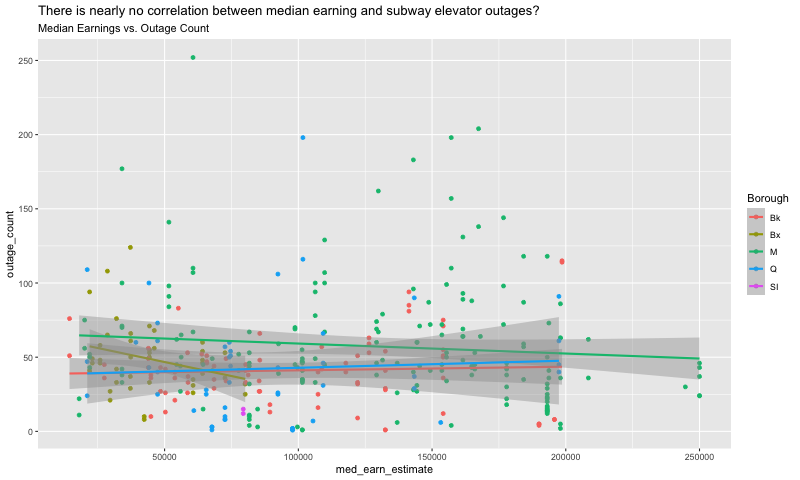

In [18]:
%%R -w 800

ggplot(df) +
    aes(x = med_earn_estimate, y = outage_count, color=Borough) +
    geom_point() +
    stat_smooth(method='lm') +
    labs(title = 'There is nearly no correlation between median earning and subway elevator outages?', subtitle = 'Median Earnings vs. Outage Count')
# code for scatter plot 1
# be sure to include a meaningful title and subtitle



`geom_smooth()` using formula = 'y ~ x'


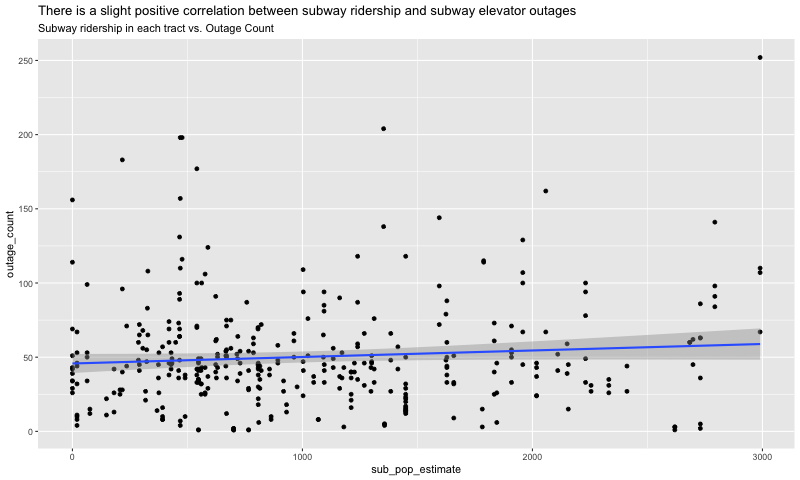

In [22]:
%%R -w 800

# code for scatter plot 2
# be sure to include a meaningful title and subtitle
ggplot(df) +
    aes(x = sub_pop_estimate, y = outage_count) +
    geom_point() +
    stat_smooth(method='lm') +
    labs(title = 'There is a slight positive correlation between subway ridership and subway elevator outages', subtitle = 'Subway ridership in each tract vs. Outage Count')

`geom_smooth()` using formula = 'y ~ x'


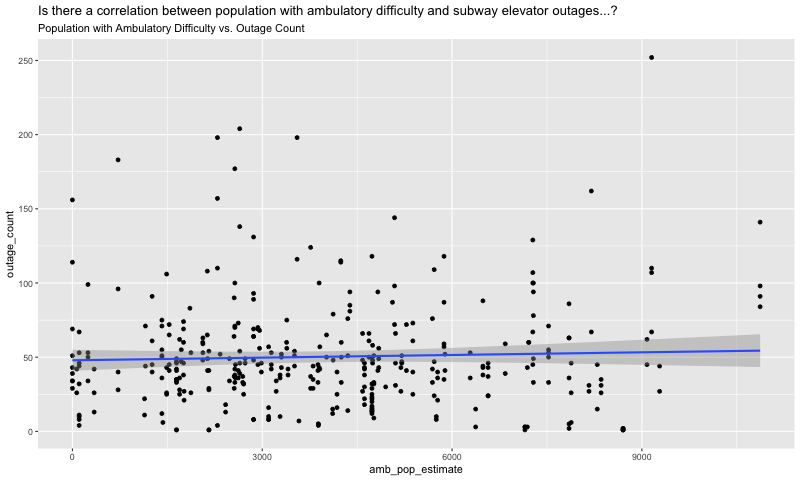

In [26]:
%%R -w 800
ggplot(df) +
    aes(x = amb_pop_estimate, y = outage_count) +
    geom_point() +
    stat_smooth(method='lm') +
    labs(title = 'Is there a correlation between population with ambulatory difficulty and subway elevator outages...?',
         subtitle = 'Population with Ambulatory Difficulty vs. Outage Count')
# code for scatter plot 3
# be sure to include a meaningful title and subtitle